# Graph Iosmorphism Problems
***

## What is Iosmorphism Problems?

"The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic." Ref:[wikipedia.org](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

The Graph Isomorphism issue is a well-known but unsolved computational problem. The problem itself isn't particularly difficult to comprehend, yet the problem has proven tough to solve due to its intricate nature. To be a Isomorphism graph the vertices and edges must be identical as shown in the diagram below.

# Determine if two graphs are isomorphic

If two graphs have the same number of vertices and edges, the same degree sequence, and the same number of circuits of a specific length, they are said to be isomorphic.

<img src="iso.jpeg"/>

Mapping:
𝑒1→𝑐1,𝑒2→𝑐3,𝑒3→𝑐5,𝑒4→𝑐2,𝑒5→𝑐4
maps the edges of the left graph precisely to those of the right graph, so that map defines an isomorphism of graphs.

# Using a algorithm to check if two graphs are the same (isomorphism)

First we have to import three libarys to help us build a graph

In [1]:
# Matrices.
import numpy as np
# Permutations
import itertools as it
# Graphs.
import networkx as nx

True

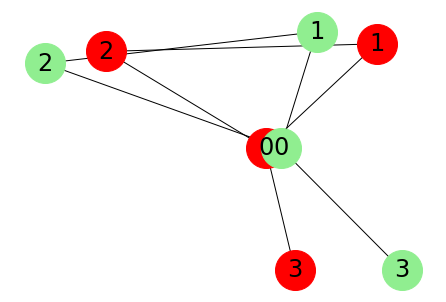

In [2]:
# makes the graphs for comparisons
G1 = nx.Graph()
E1 = {(0,1), (0,2), (0,3), (1,2)}
G1.add_edges_from(E1)

G2 = nx.Graph()
E2 = {(1,2), (0,3), (0,2), (0,1)}
G2.add_edges_from(E2)

# draws them
nx.draw(G1, with_labels=True,  node_color="red", node_size=1600, font_size=24)
nx.draw(G2, with_labels=True,  node_color="lightgreen", node_size=1600, font_size=24)


# compares graphs to check if they are the same (isomorphism)
nx.is_isomorphic(G1,G2)

As you can see it returned two showing us that this is a isomorphism graph.
Now lets look at one that is not the same.

False

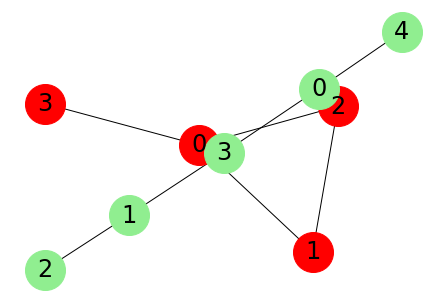

In [3]:
# makes the graphs for comparisons
G1 = nx.Graph()
E1 = {(0,1), (0,2), (0,3), (1,2)}
G1.add_edges_from(E1)

G2 = nx.Graph()
E2 = {(1,3), (0,4), (0,3), (2,1)}
G2.add_edges_from(E2)

# draws them
nx.draw(G1, with_labels=True,  node_color="red", node_size=1600, font_size=24)
nx.draw(G2, with_labels=True,  node_color="lightgreen", node_size=1600, font_size=24)


# compares graphs to check if they are the same (isomorphism)
nx.is_isomorphic(G1,G2)

As you can see by changeing certin points in the graph the shape changes and the vertices o longer match meaning this is not a isomorphism graph.

# Adjacency list & Adjancency matrix


Graphs can be represented in two data structures.
Adjacency lists and Adjancency matrix

## Adjancency List

In Adjacency List, we use an array of a list to represent the graph.

The list size is equal to the number of vertex(n).

Let's assume the list of size n as Adjlist[n]

Adjlist[0] will have all the nodes which are connected to vertex 0.

Adjlist[1] will have all the nodes which are connected to vertex 1 and so on. Ref:[Log2Base.com](https://www.log2base2.com/data-structures/graph/adjacency-list-representation-of-graph.html)

<img src= "list.png"/>

### The follwing is a Adjacency List of the graph above

<img src = "graph.png"/>

Ref for both images:[log2base2](https://www.log2base2.com/data-structures/graph/adjacency-list-representation-of-graph.html)

## Implementation

In [4]:
class AdjNode:
    def __init__(s, d):
        s.vertex = d
        s.next = None

class Graph:
    def __init__(s, v):
        s.V = v
        s.graph = [None] * s.V

# adds an edge in an undirected graph
    def add_edge(s, source, destination):
        
# Adds the node to the source node
        node = AdjNode(destination)
        node.next = s.graph[source]
        s.graph[source] = node
        node = AdjNode(source)
        node.next = s.graph[destination]
        s.graph[destination] = node
        
# draws the graph
    def print_graph(s):
        for i in range(s.V):
            print("Adjacency list of vertex {}\n head".format(i), end="")
            temp = s.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


# Driver program to the above graph class
if __name__ == "__main__":
    V = 5
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 2)
    graph.add_edge(0, 3)
    graph.add_edge(1, 3)
    graph.add_edge(1, 4)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)

    graph.print_graph()

Adjacency list of vertex 0
 head -> 3 -> 2 -> 1 

Adjacency list of vertex 1
 head -> 4 -> 3 -> 0 

Adjacency list of vertex 2
 head -> 3 -> 0 

Adjacency list of vertex 3
 head -> 4 -> 2 -> 1 -> 0 

Adjacency list of vertex 4
 head -> 3 -> 1 



## Adjancency matrix

If a graph has n vertices, we use n x n matrix to represent the graph.

Let's assume the n x n matrix as adj[n][n].

if there is an edge from vertex i to j, mark adj[i][j] as 1. i.e. adj[i][j] == 1

if there is no edge from vertex i to j, mark adj[i][j] as 0. i.e. adj[i][j] == 0
Ref :[log2base2](https://www.log2base2.com/data-structures/graph/adjacency-matrix-representation-of-graph.html)


### The follwing is a  Adjancency matrix from the graph above 

<img src= "matrix.png"/>

# Implementation

In [5]:
#A simple representation of graph using Adjacency Matrix
class Graph:
    def __init__(self,numvertex):
        self.adjMatrix = [[-1]*numvertex for x in range(numvertex)]
        self.numvertex = numvertex
        self.vertices = {}
        self.verticeslist =[0]*numvertex

    def set_vertex(self,vtx,id):
        if 0<=vtx<=self.numvertex:
            self.vertices[id] = vtx
            self.verticeslist[vtx] = id

    def set_edge(self,frm,to,cost=0):
        frm = self.vertices[frm]
        to = self.vertices[to]
        self.adjMatrix[frm][to] = cost
        #for directed graph do not add this
        self.adjMatrix[to][frm] = cost

    def get_vertex(self):
        return self.verticeslist

    def get_edges(self):
        edges=[]
        for i in range (self.numvertex):
            for j in range (self.numvertex):
                if (self.adjMatrix[i][j]!=-1):
                    edges.append((self.verticeslist[i],self.verticeslist[j],self.adjMatrix[i][j]))
        return edges
        
    def get_matrix(self):
        return self.adjMatrix

G =Graph(6)
G.set_vertex(0,'a')
G.set_vertex(1,'b')
G.set_vertex(2,'c')
G.set_vertex(3,'d')
G.set_vertex(4,'e')
G.set_vertex(5,'f')
G.set_edge('a','e',10)
G.set_edge('a','c',20)
G.set_edge('c','b',30)
G.set_edge('b','e',40)
G.set_edge('e','d',50)
G.set_edge('f','e',60)
print("Vertices of Graph")
print(G.get_vertex())
print("Edges of Graph")
print(G.get_edges())
print("Adjacency Matrix of Graph")
print(G.get_matrix())



Vertices of Graph
['a', 'b', 'c', 'd', 'e', 'f']
Edges of Graph
[('a', 'c', 20), ('a', 'e', 10), ('b', 'c', 30), ('b', 'e', 40), ('c', 'a', 20), ('c', 'b', 30), ('d', 'e', 50), ('e', 'a', 10), ('e', 'b', 40), ('e', 'd', 50), ('e', 'f', 60), ('f', 'e', 60)]
Adjacency Matrix of Graph
[[-1, -1, 20, -1, 10, -1], [-1, -1, 30, -1, 40, -1], [20, 30, -1, -1, -1, -1], [-1, -1, -1, -1, 50, -1], [10, 40, -1, 50, -1, 60], [-1, -1, -1, -1, 60, -1]]


# Refrences:
***

1).https://en.wikipedia.org/wiki/Graph_isomorphism_problem
2).https://www.log2base2.com/data-structures/graph/adjacency-list-representation-of-graph.html
3).https://www.log2base2.com/data-structures/graph/adjacency-matrix-representation-of-graph.html